<a href="https://colab.research.google.com/github/DhawalV1/Computational_Neuroscience/blob/main/VoxelTimeCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
np.set_printoptions(precision=4, suppress=True)

In [3]:
task = np.loadtxt('ds114_sub009_t2r1_cond.txt')

In [5]:
ons_durs = task[:, :2] / 2.5

In [7]:
import nibabel as nib
img = nib.load('ds114_sub009_t2r1.nii')

In [8]:
time_course = np.zeros(img.shape[-1])

In [9]:
ons_durs = np.round(ons_durs).astype(int)
for onset, duration in ons_durs:
  time_course[onset:onset + duration] = 1

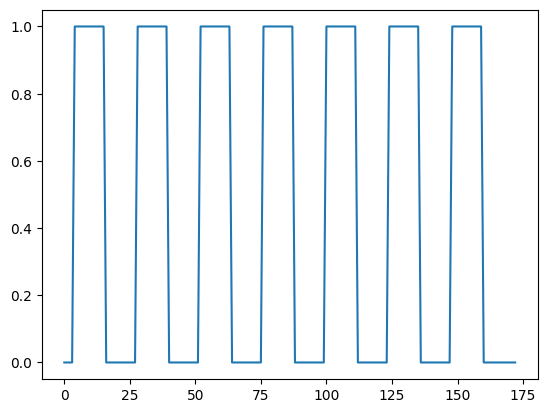

In [10]:
plt.plot(time_course)


In [12]:
#- Make two boolean arrays encoding task, rest
is_task_tr = (time_course == 1)
is_rest_tr = (time_course == 0)

In [14]:
# Read the image data into an array.
data = img.get_fdata()

In [17]:
on_volumes = data[..., is_task_tr]
off_volumes = data[..., is_rest_tr]

In [18]:
#- Create the mean volume across all the task volumes.
#- Then create the mean volume across all the rest volumes
# Hint: remember the `axis` keyword.
on_mean = on_volumes.mean(axis=-1)
off_mean = off_volumes.mean(axis=-1)

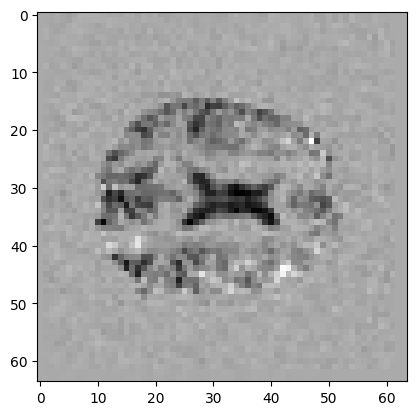

In [20]:
difference = on_mean - off_mean
plt.imshow(difference[:, :, 14], cmap='gray')

In [22]:
voxels_by_time = data.reshape((-1, data.shape[-1]))
print(voxels_by_time.shape)

stds = np.std(voxels_by_time, axis=0)

(122880, 173)


In [26]:
np.argmax(stds)

0

In [27]:
off_volumes_fixed = off_volumes[..., 1:]

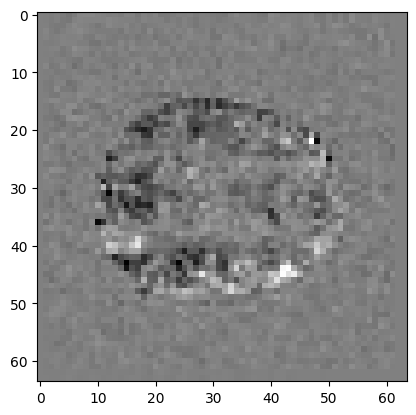

In [28]:
off_mean_fixed = off_volumes_fixed.mean(axis=-1)
difference_fixed = on_mean - off_mean_fixed
plt.imshow(difference_fixed[:, :, 14], cmap='gray')


In [29]:
img = nib.load('ds114_sub009_t2r1.nii')

In [33]:
data = img.get_fdata()
data = data[...,1:]

In [34]:
voxel_time_course = data[42, 32, 19]

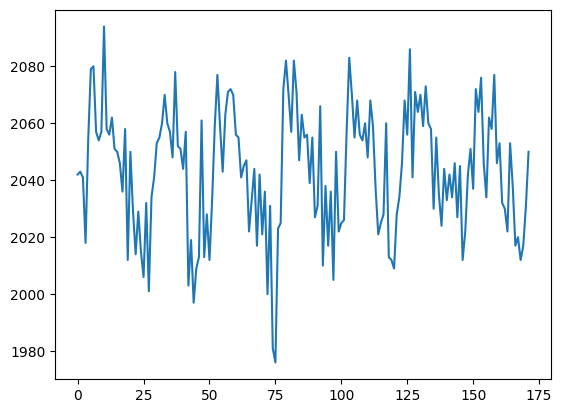

In [35]:
plt.plot(voxel_time_course)

In [55]:

def events2neural(task_fname, tr, n_trs):
    """ Return predicted neural time course from event file `task_fname`

    Parameters
    ----------
    task_fname : str
        Filename of event file
    tr : float
        TR in seconds
    n_trs : int
        Number of TRs in functional run

    Returns
    -------
    time_course : array shape (n_trs,)
        Predicted neural time course, one value per TR
    """
    task = np.loadtxt(task_fname)
    # Check that the file is plausibly a task file
    if task.ndim != 2 or task.shape[1] != 3:
        raise ValueError("Is {0} really a task file?", task_fname)
    # Convert onset, duration seconds to TRs
    task[:, :2] = task[:, :2] / tr
    ons_dur = task[:, :2]
    if np.any(ons_dur != np.round(ons_dur)):
        raise ValueError('onsets, durations should be multiples of TR')
    # Neural time course from onset, duration, amplitude for each event
    time_course = np.zeros(n_trs)
    for onset, duration, amplitude in task:
        # Make onset and duration integers
        onset = int(round(onset))
        duration = int(round(duration))
        time_course[onset:onset + duration] = amplitude
    return time_course

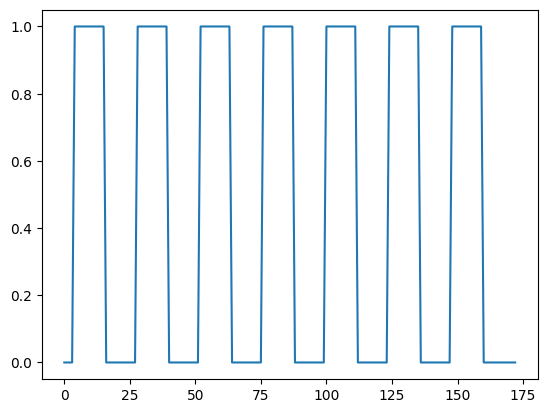

In [74]:
TR = 2.5  # time between volumes
n_trs = img.shape[-1]  # The original number of TRs
neural = events2neural('ds114_sub009_t2r1_cond.txt', TR, n_trs)
plt.plot(neural)

In [72]:
neural

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

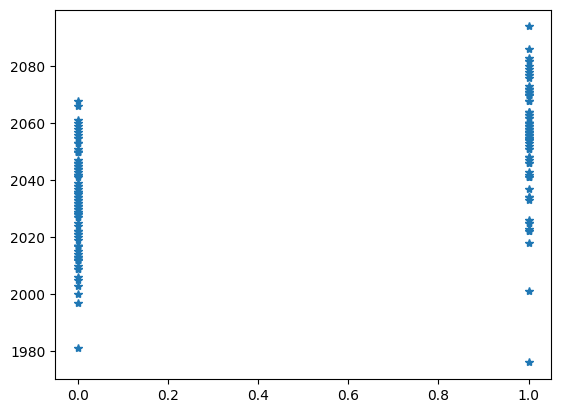

In [77]:
# Plot the neural prediction against the data
neural1 = neural[1:]
# Notice the 'o' to specify the "line marker"
plt.plot(neural1, voxel_time_course, '*')

# Set the axis limits to give space on left and right
# axis = plt.gca()
# axis.set_xlim(-0.1, 1.1)

In [79]:
np.corrcoef(neural1, voxel_time_course)

array([[1.    , 0.5429],
       [0.5429, 1.    ]])